In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
# 데이터분석 세트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import matplotlib as mpl
import os
import plotly.express as px
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
import gc
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import math
from sklearn.model_selection import StratifiedKFold as kfold
from sklearn.metrics import mean_absolute_error
from lightgbm import LGBMRegressor 
from xgboost import XGBRegressor


import lightgbm as lgb
# from sklearn.model_selection import StratifiedKFold as kfold
# from sklearn.ensemble import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures







# plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'NanumGothic'
plt.rc("font", family="Malgun Gothic")
plt.rc('font', family='NanumBarunGothic') 

import warnings
warnings.filterwarnings('ignore')

In [43]:
# A1 퍼포먼스 팩토리 데이터 불러오기
base_path = "/content/drive/MyDrive/Colab Notebooks/A1_퍼포먼스 팩토리 with 김재승/"

bidding = pd.read_csv(base_path + "bidding_results_adding.csv", encoding="utf-8" )
log = pd.read_csv(base_path + "log_csv.csv",  encoding="utf-8")
# 중복 제거 된 데이터 셋(날짜가 같으면서 광고값 중복 제거)
bidding = bidding.drop_duplicates(subset= ["index", "date"])

In [57]:
X_train = X_train.astype(int)

In [69]:
bidding

,index,Impression,Click,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,date
0,3575092,3,0,0.0,3.000000,50,165900,165900,0,가구/인테리어,침실가구,장롱/붙박이장,드레스룸,20221031
1,3575637,6,0,0.0,3.333333,50,10900,10900,0,가구/인테리어,인테리어소품,아로마/캔들용품,아로마방향제/디퓨저,20221031
2,4129259,7,0,0.0,8.000000,50,255000,255000,-1,가구/인테리어,거실가구,소파,패브릭소파,20221031
3,4131479,36,3,150.0,4.416667,140,190000,190000,20000,가구/인테리어,아동/주니어가구,책상의자세트,NaN,20221031
4,4131482,224,0,0.0,5.696429,50,129000,129000,0,가구/인테리어,아동/주니어가구,책상,NaN,20221031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337083,2566795,5,0,0.0,13.200000,500,19900,19900,0,가구/인테리어,인테리어소품,아로마/캔들용품,아로마방향제/디퓨저,20230103
1337084,2566880,3,0,0.0,17.000000,500,23900,23900,3000,생활/건강,문구/사무용품,이벤트/파티용품,데코용품,20230103
1337085,2566881,1,0,0.0,8.000000,500,2500,2500,3000,가구/인테리어,인테리어소품,기타장식용품,NaN,20230103
1337086,2566891,2,0,0.0,4.000000,500,21000,21000,3000,생활/건강,정원/원예용품,화분받침,NaN,20230103


In [53]:
bidding.isnull().sum()

index                   0
Impression              0
Click                   0
Cost                    0
Sum of AD rank          9
Bid                     0
Price(PC)               0
Price(Mobile)           0
Delivery Fee            0
Category Name 1         0
Category Name 2         0
Category Name 3      5179
Category Name 4    361679
date                    0
dtype: int64

In [54]:
bidding['Category Name 4'].fillna(0)

0                드레스룸
1          아로마방향제/디퓨저
2               패브릭소파
3                   0
4                   0
              ...    
1337083    아로마방향제/디퓨저
1337084          데코용품
1337085             0
1337086             0
1337087    퍼즐/그림/사진액자
Name: Category Name 4, Length: 1185171, dtype: object

In [45]:
# 변수 선택
y_train = bidding["Sum of AD rank"]

X_train = bidding.drop(['Category Name 1', 'Category Name 2', 'Category Name 3', 'date', "Sum of AD rank", "date" ], axis=1)



In [15]:
bidding = bidding.dropna()

In [46]:
# 범주형 변수 인코딩
# label encoding
str_col = ['Category Name 4']
for i in str_col:
    le = LabelEncoder()
    le=le.fit(X_train[i])
    X_train[i]=le.transform(X_train[i])
    
    # for label in np.unique(test[i]):
    #     if label not in le.classes_: 
    #         le.classes_ = np.append(le.classes_, label)
    # test[i]=le.transform(test[i])

In [ ]:
# str_col = ['laterality', 'view']
# for i in str_col:
#     le = LabelEncoder()
#     le=le.fit(test_df[i])
#     test_df[i]=le.transform(test_df[i])

In [ ]:
# # onehot_encoding
# train = pd.get_dummies(train, columns = str_col[1:], drop_first=False)
# test = pd.get_dummies(test, columns = str_col[1:], drop_first=False)


In [47]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train.loc[:, :] = scaler.transform(X_train)
# X_test.loc[:, :] = scaler.transform(X_test)


print(X_train)
# print(X_test)

            index  Impression     Click      Cost       Bid  Price(PC)  \
0       -0.623419   -0.122856 -0.209692 -0.099336 -0.807799  -0.026554   
1       -0.623209   -0.113333 -0.209692 -0.099336 -0.807799  -0.378637   
2       -0.409993   -0.110159 -0.209692 -0.099336 -0.807799   0.175838   
3       -0.409138   -0.018108  0.702995 -0.011774 -0.482742   0.028190   
4       -0.409137    0.578636 -0.209692 -0.099336 -0.807799  -0.110372   
...           ...         ...       ...       ...       ...        ...   
1337083 -1.011743   -0.116507 -0.209692 -0.099336  0.817486  -0.358194   
1337084 -1.011711   -0.122856 -0.209692 -0.099336  0.817486  -0.349108   
1337085 -1.011710   -0.129204 -0.209692 -0.099336  0.817486  -0.397718   
1337086 -1.011706   -0.126030 -0.209692 -0.099336  0.817486  -0.355695   
1337087 -1.011694   -0.087940 -0.209692 -0.099336  0.817486  -0.110827   

         Price(Mobile)  Delivery Fee  Category Name 4  
0            -0.026554     -0.372537        -1.587680  

In [48]:
# Train-Test Split

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=2023)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(829619, 9) (829619,)
(355552, 9) (355552,)


In [ ]:
X_train.isfinite(mat.all())

## Xgboost

In [58]:
# xgboost 모델
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)


xgb_model.fit(X_train, y_train,
                eval_set=[(X_val, y_val)],
                eval_metric='mae',
                verbose=100,
                early_stopping_rounds=200)    


from sklearn.metrics import mean_absolute_error
print(f"훈련 셋: {mean_absolute_error(y_train, xgb_model.predict(X_train))}")
print(f"검증 셋: {mean_absolute_error(y_val, xgb_model.predict(X_val))}")

[03:32:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-mae:nan
Will train until validation_0-mae hasn't improved in 200 rounds.
[99]	validation_0-mae:nan


ValueError: ignored

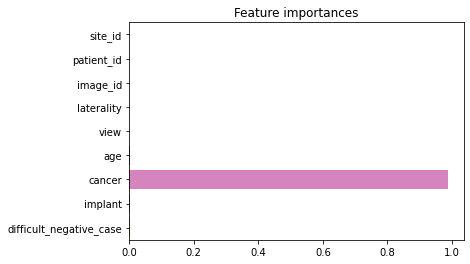

In [ ]:
# Xgboost 의 피처 중요도
feature_names = X_train.columns
importances = xgb_model.feature_importances_
sns.barplot(y=feature_names, x=importances, estimator=np.mean)
plt.title("Feature importances")
plt.show()

In [ ]:
# xgb 추론
pred1 = xgb_model.predict(X_val)
len(pred1)

16412

In [ ]:
#xgb submission 예비형식
sub1 = submission.copy()
sub1['target'] = pred  

## LightGBM

In [61]:
# LightGBM
import lightgbm as lgb

lgb_model = lgb.LGBMRegressor(n_estimators=10000, 
                              num_leaves = 128, 
                              subsample=0.6,
                              colsample_bytree=0.7,
                              reg_lambda=15,
                              random_state=20)


lgb_model.fit(X_train, y_train,
                eval_set=[(X_val, y_val)],
                eval_metric='l1',
                verbose=500,
                early_stopping_rounds=100)    


from sklearn.metrics import mean_absolute_error
print(f"훈련 셋: {mean_absolute_error(y_train, lgb_model.predict(X_train))}")
print(f"검증 셋: {mean_absolute_error(y_val, lgb_model.predict(X_val))}")

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's l2: nan	valid_0's l1: nan


ValueError: ignored

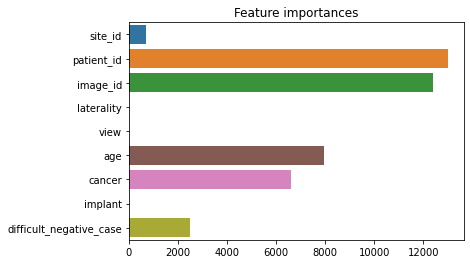

In [ ]:
#lgb_feature importance
feature_names = X_train.columns
importances = lgb_model.feature_importances_
sns.barplot(y=feature_names, x=importances, estimator=np.mean)
plt.title("Feature importances")
plt.show()

In [ ]:
#lgb_추론
pred2 = lgb_model.predict(X_val)
len(pred2)

16412

In [ ]:
#lgb submission 예비형식
sub2 = submission.copy()
sub2['target'] = pred2  

In [64]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 10.7 MB/s eta 0:00:00


In [ ]:
# # catboost 모델1

# # from sklearn.model_selection import train_test_split
# # X_train, X_val,y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, random_state=20)

# from catboost import CatBoostClassifier


# clf = CatBoostRegressor(
#     iterations=10000, 
#     learning_rate=0.1, 
#     #loss_function='CrossEntropy'
# )


# clf.fit(X_train, y_train, 
#         eval_set=(X_val, y_val), 
#         verbose=False
# )

# print('CatBoost model is fitted: ' + str(clf.is_fitted()))
# print('CatBoost model parameters:')
# print(clf.get_params())

In [ ]:
# catboost 모델2
from catboost import CatBoostRegressor
clf = CatBoostRegressor(iterations=10000, learning_rate=0.01, l2_leaf_reg=3.5, depth=8, rsm=0.98, loss_function= 'Logloss', eval_metric='AUC',use_best_model=True,random_seed=42)

clf.fit(
    X_train, y_train,
    eval_set=(X_val, y_val),
)

In [ ]:
print(clf.predict(data=X_val))

[0 0 0 ... 0 0 0]


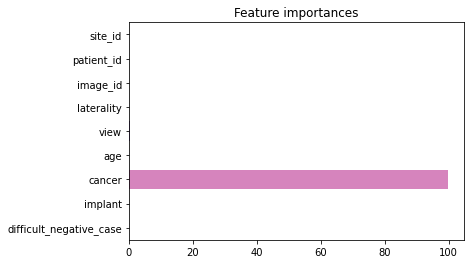

In [ ]:
# catboost 피처중요도
feature_names = X_train.columns
importances = clf.feature_importances_
sns.barplot(y=feature_names, x=importances, estimator=np.mean)
plt.title("Feature importances")
plt.show()

In [ ]:
#cat 추론
pred3 = clf.predict_proba(X_val)
len(pred3)


16412

In [ ]:
#catboost submission 예비형식
sub3 = submission.copy()
sub3['target'] = pred3 

In [ ]:
# #Ensemble
# submission['target'] = np.round((sub1['target'] + sub2['target'] + sub3['target']) / 3)
# submission.to_csv("./final_submission2.csv", index = False)  

In [ ]:
submission['target'] = sub3['target']
submission.to_csv("./final_submission4.csv", index = False)  

In [ ]:
# print("Prediction")
# pred_train = model.predict(X_train)
# pred_test = model.predict(X_val)

# train_score = evaluation_metric(y_train, pred_train)
# test_score = evaluation_metric(y_val, pred_test)

# print("Train Score : %.4f" % train_score)
# print("Test Score : %.4f" % test_score)

In [ ]:
# KFold(CV), partial : optuna를 사용하기 위함
from sklearn.model_selection import KFold
from functools import partial

# hyper-parameter tuning을 위한 라이브러리, optuna
import optuna


def optimizer(trial, X, y, K):
    # 조절할 hyper-parameter 조합을 적어줍니다.
    iterations = trial.suggest_int('iterations', 1000, 5000)
    depth = trial.suggest_int('depth', 3, 5)  # 범위
    # max_features = trial.suggest_float('max_features', 0.7, 0.9)

    
    
    # 원하는 모델을 지정합니다, optuna는 시간이 오래걸리기 때문에 저는 보통 RF로 일단 테스트를 해본 뒤에 LGBM을 사용합니다.
    model = cb.CatBoostClassification(iterations=iterations,
                                 depth=depth)
    
    
    # K-Fold Cross validation을 구현합니다.
    from sklearn.model_selection import StratifiedKFold
    folds = StratifiedKFold(n_splits=K, shuffle=True, random_state=42)
    scores = []
    
    for train_idx, val_idx in folds.split(X_train, y_train):
        X_train2 = X_train.iloc[train_idx, :]
        y_train2 = y_train.iloc[train_idx]
        
        X_val2 = X_train.iloc[val_idx, :]
        y_val2 = y_train.iloc[val_idx]
        
        model.fit(X_train2, y_train2)
        preds = model.predict(X_val2)
        score = evaluation_metric(y_val2, preds)
        scores.append(score)
    
    del model
    gc.collect()
    # K-Fold의 평균 loss값을 돌려줍니다.
    return np.mean(scores)